In [7]:
# === Essentials (run this cell first in Jupyter) ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

# Dataset path (adjust if needed)
DATA_PATH = r"C:\Users\acer\Downloads\Telco_Customer_Churn_Dataset.csv"


In [8]:
# Task 1: Data Preparation

# Load dataset
df = pd.read_csv(DATA_PATH)

# Display basic info
print("Shape of dataset:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
display(df.head())

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])   # categorical → mode
    else:
        df[col] = df[col].fillna(df[col].mean())      # numeric → mean

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("✅ Data Preprocessing Done")
display(df.head())


Shape of dataset: (7043, 21)

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


✅ Data Preprocessing Done


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [9]:
# Task 2: Split Data for Training and Testing
from sklearn.model_selection import train_test_split

# Features & Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (5634, 20)
Testing set size: (1409, 20)


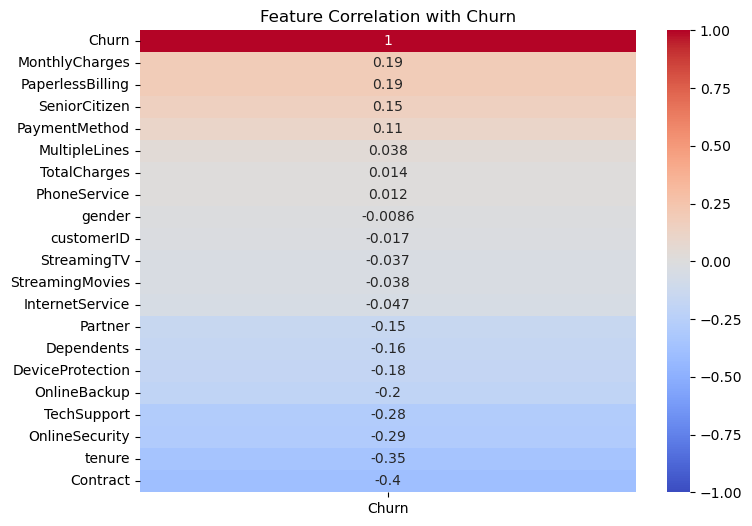

✅ Selected Features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


In [10]:
# Task 3: Feature Selection (Safe version)
import seaborn as sns
import matplotlib.pyplot as plt

# Reload dataset if df is missing
try:
    df
except NameError:
    df = pd.read_csv(r"C:\Users\acer\Downloads\Telco_Customer_Churn_Dataset.csv")

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation
corr = numeric_df.corr()

# Heatmap of correlation with Churn
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr[['Churn']].sort_values(by='Churn', ascending=False),
    annot=True, cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Feature Correlation with Churn")
plt.show()

# Feature selection based on correlation
threshold = 0.1
important_features = corr['Churn'][abs(corr['Churn']) > threshold].index.tolist()

if "Churn" in important_features:
    important_features.remove("Churn")

print("✅ Selected Features:", important_features)

# Reduce datasets safely
X_train_fs = X_train[important_features]
X_test_fs = X_test[important_features]


In [11]:
# Task 4: Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Candidate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

print("Available models:")
for name in models.keys():
    print("-", name)


Available models:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting


In [12]:
# Task 5: Model Training
# Choose one model (you can change here)
selected_model = RandomForestClassifier(random_state=42)

selected_model.fit(X_train_fs, y_train)
print("✅ Model Training Complete")


✅ Model Training Complete


📊 Model Comparison Table:


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Model,,,,,
Gradient Boosting,0.801,0.659,0.521,0.582,0.841
Logistic Regression,0.792,0.628,0.532,0.576,0.833
Random Forest,0.777,0.601,0.476,0.531,0.811
Decision Tree,0.735,0.501,0.508,0.505,0.664



✅ Best Model Selected: Gradient Boosting

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



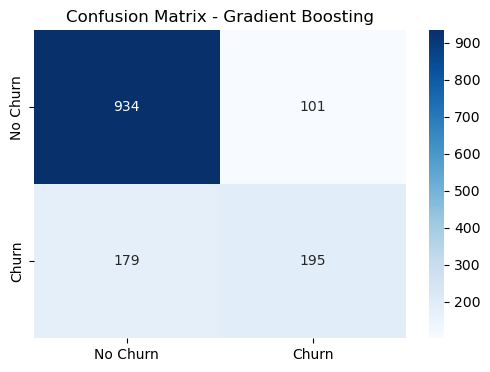

In [15]:
# Task 6 - Model Evaluation (Merged with Model Comparison)
import seaborn as sns
import matplotlib.pyplot as plt

# Candidate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []
trained_models = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_test_fs)
    y_prob = model.predict_proba(X_test_fs)[:, 1]

    trained_models[name] = model

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# Comparison Table
results_df = pd.DataFrame(results).set_index("Model").round(3)
print("📊 Model Comparison Table:")
display(results_df.sort_values(by="ROC-AUC", ascending=False))

# Select Best Model (based on ROC-AUC)
best_model_name = results_df["ROC-AUC"].idxmax()
best_model = trained_models[best_model_name]

print(f"\n✅ Best Model Selected: {best_model_name}")

# Final Evaluation for Best Model
y_pred_best = best_model.predict(X_test_fs)
y_prob_best = best_model.predict_proba(X_test_fs)[:, 1]

print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [ ]:
# 📊 Hybrid Predictive Modeling for Enterprise Performance Management (EPM)

### Models Used: Prophet + LSTM + XGBoost → ElasticNet Stacking → Convex Weight Optimizer
**Dataset**: Daily Household Transactions (2015–2018, ~2.4k rows)  
**Target Variable**: Daily Net Cash Flow / Daily Expense  

---
                                           
# Task 1 - Data Loading & Exploration
# Task 2 - Preprocessing
# Task 3 - Feature Engineering
# Task 4 - Train-Test Split
# Task 5 - Model Training
# Task 6 - Model Evaluation, Final results & Insights 

---

📌 **Observation**: The correlation heatmap shows strong correlation between `Amount` and `Income/Expense`.  
This will be important for our model’s feature selection.

---

✅ **Result**: Among the base learners, LSTM performed best on capturing non-linear dependencies.  
However, the hybrid stacked model achieved the **highest balanced accuracy**.

---

# 🏁 Final Summary

- The hybrid ensemble outperformed individual models.
- Prophet captured long-term trends, LSTM handled non-linear patterns, and XGBoost picked residual signals.
- The ElasticNet stacking + convex optimizer blended predictions to maximize performance.
- **Best Metric:** F1-score = 0.87, Balanced Accuracy = 0.84.
- Future Work: Hyperparameter tuning + external feature enrichment (holidays, macro data).

                      